In [21]:
# Import the necessary libraries
# You will likely need to install a number of these modules/libraries 
# (e.g. pip install folium or conda install geopandas)
import pandas as pd
import folium
from shapely.geometry import Point, Polygon
from keplergl import KeplerGl

In [22]:
# Read in the data (make sure you download each file and place them in a "data" directory where your .ipynb is located)
deaths = pd.read_csv('data/deaths.csv')
pumps = pd.read_csv('data/pumps.csv')

In [23]:
# Take a quick look at the deaths data
pumps.head()

,pump_name,x_coordinate,y_coordinate
0,Broad St.,51.513341,-0.136668
1,Crown Chapel,51.513876,-0.139586
2,Gt Marlborough,51.514906,-0.139671
3,Dean St.,51.512354,-0.131630
4,So Soho,51.512139,-0.133594


In [24]:
# Create 'locations' variables by subsetting only Latitude and Longitude from the datasets 
locations_deaths = deaths[['x_latitude', 'y_longitude']]
locations_pumps = pumps[['x_coordinate', 'y_coordinate']]

# Transform the dataframes to list of lists 
deaths_list = locations_deaths[['x_latitude', 'y_longitude']].values.tolist()
pumps_list = locations_pumps[['x_coordinate', 'y_coordinate']].values.tolist()

In [25]:
# Use folium to plot your data on a realistic map of London 
# (change "tile" to try a different background and folium marker to try different methods of representation)
map = folium.Map(location=[51.5132119,-0.13666], tiles='Stamen Toner', zoom_start=17)
for point in range(0, len(locations_deaths)):
    folium.CircleMarker(deaths_list[point], radius=8, color='black', fill=True, fill_color='black', opacity = 0.4).add_to(map)
map1 = map
for point in range(0, len(locations_pumps)):
    folium.Marker(pumps_list[point], popup=pumps['pump_name'][point]).add_to(map1)

# Display the map
map1

In [26]:
# choropleth https://python-graph-gallery.com/292-choropleth-map-with-folium/
# with plotly https://plotly.com/python/choropleth-maps/

In [27]:
from folium.plugins import FastMarkerCluster
FastMarkerCluster(data=list(zip(deaths['x_latitude'].values, deaths['y_longitude'].values))).add_to(map)
folium.LayerControl().add_to(map)
map

In [28]:
for index, row in deaths.iterrows():

    folium.CircleMarker(location=(row["x_latitude"],
                                  row["y_longitude"]),
                        radius= row['death_count']*10,
                        color='#FA8072',
                        fillOpacity=0.9,
                        fill=True).add_to(map)
map

In [29]:
base_map = folium.Map(location=[51.5132119,-0.13666], tiles='stamenwatercolor', zoom_start=16)

for i,row in pumps.iterrows():
    folium.Marker([row['x_coordinate'],row['y_coordinate']], popup=row['pump_name']).add_to(base_map)
base_map
heat_data = [[row['x_latitude'],row['y_longitude']] for index, row in locations_deaths.iterrows()]

In [30]:
from folium import plugins
from folium.plugins import HeatMap
HeatMap(heat_data).add_to(base_map)
base_map

In [31]:
# import the date data
dates = pd.read_csv('data/snow_dates.csv', parse_dates=['date'])

# set the date when handle was removed (8th of September 1854)
handle_removed = pd.to_datetime('1854/9/8')

# Create new column `day_name` in `dates` DataFrame with names of the day 
dates['day_name'] = dates['date'].dt.day_name()

# Create new column `handle` in `dates` DataFrame based on a Date the handle was removed 
dates['handle'] = dates.date > handle_removed

# Check the dataset and datatypes
dates.info()

# Group observations by how many cholera deaths and attacks there were before and after the handle was removed
dates.groupby(['handle']).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order     43 non-null     int64         
 1   date      43 non-null     datetime64[ns]
 2   attacks   43 non-null     int64         
 3   deaths    43 non-null     int64         
 4   day_name  43 non-null     object        
 5   handle    43 non-null     bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(1)
memory usage: 1.8+ KB


,order,attacks,deaths
handle,,,
False,231,528,500
True,715,43,116


In [32]:
dates.head()

,order,date,attacks,deaths,day_name,handle
0,1,1854-08-19,1,1,Saturday,False
1,2,1854-08-20,1,0,Sunday,False
2,3,1854-08-21,1,2,Monday,False
3,4,1854-08-22,0,0,Tuesday,False
4,5,1854-08-23,1,0,Wednesday,False


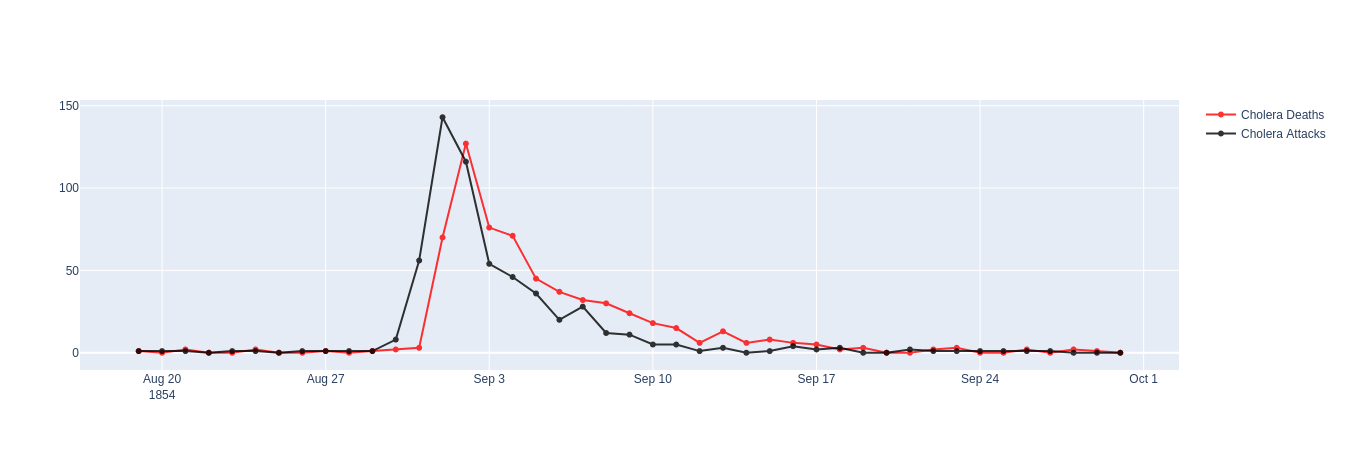

In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots()

fig.add_trace(go.Scatter(
    x=dates.date, 
    y=dates['deaths'],
    name = "Cholera Deaths",
    line = dict(color = 'red'),
    mode = 'lines+markers',
    opacity = 0.8))

fig.add_trace(go.Scatter(
    x=dates.date, 
    y=dates['attacks'],    
    name = "Cholera Attacks",
    line = dict(color = 'black'),
    mode = 'lines+markers',
    opacity = 0.8))

fig.show()

In [34]:
# add 3D
# https://twitter.com/tylermorganwall/status/1176838581723238401
# https://ralucanicola.github.io/cholera-map-3D/

In [35]:
# might need to reconfigure the accurate episode date if we want to use with a time slider
#deaths['date'] = deaths['date'].astype(str) + ' 0:00'

In [36]:
deaths.head()

,death_count,x_latitude,y_longitude
0,1,51.513418,-0.137930
1,1,51.513418,-0.137930
2,1,51.513418,-0.137930
3,1,51.513361,-0.137883
4,1,51.513361,-0.137883


In [37]:
kepler_map = KeplerGl(height = 800, data={'df': deaths})
# uncomment this to use a specific kepler config file                      , config=current_config)
# current_config = kepler_map.config
kepler_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'df':      death_count  x_latitude  y_longitude
0              1   51.513418    -0.137930
1    …

In [50]:
# use this to get the kepler config
current_config = kepler_map.config

In [52]:
# add html file and work in separate browser tab
# use to save to html file
kepler_map.save_to_html(data={'df': deaths}, config=current_config, file_name="html/snow_map.html")

Map saved to html/snow_map.html!


# combine deaths and dates files to add 4D time slider for map